In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

Implementamos la funcion matematica "Similitud de cosenos" para conocer la similitud entre vectores

In [2]:
Juan = [5,4,4]
Diego = [4,5,5]
cosine_similarity([Juan, Diego])

array([[1.        , 0.97823198],
       [0.97823198, 1.        ]])

Otra manera de hacerlo es con NUMPY empleando la siguiente linea de codigo

In [3]:
np.dot(Juan,Diego)/np.dot(np.linalg.norm(Juan), np.linalg.norm(Diego))

0.9782319760890369

Esto seria util en el escenario perfecto, pero en la mayoria de los casos, hay matrices que no tienen un valor definido por lo que no podemos calcular la similitud de un valor que no esta definido

In [4]:
user_item = np.array([[5, np.nan, 4],[4,3,5],[4,5,5],[np.nan, 5, np.nan], [np.nan, 5, 3]])
user_item

array([[ 5., nan,  4.],
       [ 4.,  3.,  5.],
       [ 4.,  5.,  5.],
       [nan,  5., nan],
       [nan,  5.,  3.]])

Por lo que utilizare la libreria "Surprise". Esta misma es una API de Scikit-learn y permite implementar varios algortimos basicos de recomendacion

In [5]:
%pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156233 sha256=54f1a5616e8450fb3b98666248ac9908b67c9efb34f99a3f1a76f9b2638a237a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


Descargamos la base de datos

In [6]:
%pip install wget
import wget
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
filename = wget.download(url)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7e3f04ec2e6be9ea01b1da70dfd187542d2e3c44070f2ba5bdb4dc0a539dfda6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Ya que tenemos la Database, ahora hay que leerla, separarla por los espacios, por eso el \t

In [7]:
mlens = pd.read_csv("u.data",sep="\t",header=None)
mlens.columns = ["user_id","item_id","rating","timestamp"]

In [8]:
mlens = mlens.drop("timestamp", axis=1)

In [9]:
from surprise import Dataset, Reader
reader = Reader(rating_scale=(mlens["rating"].min(),mlens["rating"].max()))

In [10]:
dataset = Dataset.load_from_df(mlens,reader)

In [11]:
dataset

In [12]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

Definimos algunas combinaciones de hiperparametros los cuales seran utilizadas al momento de recomnedarle al usuario. Estos hiperparametros buscan encontrar la configuracion optima para que el algoritmo funcione de la mejor manera posible

In [13]:
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}


Ahora que ya tenemos los parametros, creo una variable la cual contiene un objeto GridSearchCV la cual utilizo para que haga una busqueda de hiperparametros los cuales los voy a implementar en el algoritmo SVD. Una vez que se encuentren estos hiperparametros, el model se auto reajustara con estos ultimos

In [14]:
gs = GridSearchCV(SVD, param_grid, measures=['fcp',"rmse"], cv=3, refit=True)

Ejecutamos la busqueda para encontrar los mejores hiperparametros

In [15]:
gs.fit(dataset)

Printeo la informacion de cual fue el mejor modelo encontrado, tanto con  RMSE (Root Mean Squared Error, Error Cuadrático Medio de Raíz) o con "fcp" (Fraction of Concordant Pairs, Fracción de Pares Concordantes) LAS CUALES SON MEDIDAS QUE INGRESAMOS ANTERIORMENTE

In [16]:
gs.best_score

{'fcp': 0.6992031670404432, 'rmse': 0.963789825782253}

Printeamos la informacion de cuales fueron los mejores parametro para luego reajustar el modelo

In [17]:
gs.best_params

{'fcp': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6},
 'rmse': {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}}

In [18]:
best_model = gs.best_estimator["fcp"]

Junto al mejor modelo encontrado, predice la relacion entre el usuario 196 y el item 242

In [19]:
pred = best_model.predict("196", "242")

Imprimimos el resultado

In [20]:
pred.est

3.52986

Probamos lo mismo que antes pero utilizando unas medidas diferentes, en vez de utilizar SVD esta vez utilizo SVDpp

In [21]:
from surprise import SVDpp
gs = GridSearchCV(SVDpp, param_grid, measures=['fcp',"rmse"], cv=3, refit=True)
gs.fit(dataset)
gs.best_score

{'fcp': 0.6972733370119921, 'rmse': 0.9641150314105356}

###Sistema de Recomendacion basado en el contenido

In [22]:
!git clone https://github.com/karen-pal/borges

Cloning into 'borges'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 211 (delta 89), reused 171 (delta 49), pack-reused 0
Receiving objects: 100% (211/211), 2.21 MiB | 5.62 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [23]:
pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255317 sha256=ea62a757885fb2c90cbf211f8d13b89604a8e9beaca6682b6ef72563b896472d
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


Se coleccionan del dataset todos los archivos que terminen con la extension pkl y que anterior a la extension se encuentre la palabra texts. Luego, se itera cada archivo, y se abre cada uno de estos para luego coleccionarlos en la variable Df (Dataframe)

In [24]:
import pickle
from pathlib import Path
import pandas as pd

df = pd.DataFrame()
# usando el asterisco de "wildcard" traemos todos los archivos en formato pickle
pkls = Path('.').glob('./borges/datasets/*texts.pkl')

# leemos todos los pickles y concatenarlos en un DataFrame
for pkl in pkls:
    with open(pkl, 'rb') as inp:
        df_ = pickle.load(inp)
    df = pd.concat([df, df_])

df.shape

(719, 3)

In [25]:
df.sample(3)

,link,text_metadata,text
6,https://ciudadseva.com/texto/biografia-de-tade...,"{'title': 'Biografía de Tadeo Isidoro Cruz', '...","El seis de febrero de 1829, los montoneros que..."
0,https://ciudadseva.com/texto/almuerzos/,"{'title': 'Almuerzos', 'metadata': '[Minicuent...",En el restaurante de los cronopios pasan estas...
29,https://ciudadseva.com/texto/historia-de-rosen...,"{'title': 'Historia de Rosendo Juárez', 'metad...","Serían las once de la noche, yo había entrado ..."


In [26]:
# separamos de la metadata el título y autor en sus propias columnas
df['title'] = df['text_metadata'].apply(lambda x: x['title'])
df['author'] = df['text_metadata'].apply(lambda x: x['author'])

In [27]:
df.head(4)

,link,text_metadata,text,title,author
0,https://ciudadseva.com/texto/el-antropofago/,"{'title': 'El antropófago', 'metadata': '[Cuen...","Allí está, en la penitenciaría, asomando por e...",El antropófago,Pablo Palacio
1,https://ciudadseva.com/texto/la-doble-y-unica-...,"{'title': 'La doble y única mujer', 'metadata'...",(Ha sido preciso que me adapte a una serie de ...,La doble y única mujer,Pablo Palacio
2,https://ciudadseva.com/texto/revolucion-palacio/,"{'title': 'Revolución', 'metadata': '[Minicuen...","Pesas, pesas tanto. Pues salta sobre un platil...",Revolución,Pablo Palacio
3,https://ciudadseva.com/texto/senora-palacio/,"{'title': 'Señora', 'metadata': '[Cuento - Tex...","–Usted fue, sí, usted fue. –¿Señora…? –Le digo...",Señora,Pablo Palacio


In [28]:
# vemos los autores disponibloes
df['author'].value_counts()

Jorge Luis Borges             60
Julio Cortázar                55
Baldomero Lillo               50
Juan José Arreola             45
Augusto Monterroso            45
Alfonso Reyes                 37
Enrique Anderson Imbert       36
Mario Benedetti               33
Julio Ramón Ribeyro           27
Clarice Lispector             25
Roberto Arlt                  25
Julio Torri                   23
Felisberto Hernández          15
Luis Vidales                  14
Adolfo Bioy Casares           13
Rubén Darío                   13
Álvaro Mutis                  11
Edmundo Valadés               10
Juan Rulfo                    10
Juan Rodolfo Wilcock          10
Salarrué                       9
Manuel A. Alonso               9
Elena Garro                    9
Eduardo Gudiño Kieffer         8
Juan Bosch                     8
Alejo Carpentier               8
Virgilio Díaz Grullón          7
Silvina Ocampo                 7
Andrés Rivera                  7
Rodolfo Walsh                  6
Ricardo Gü

In [29]:
# quitamos duplicados y reiniciamos el índice
df = df.drop_duplicates(subset=[c for c in df.columns if c != 'text_metadata'])
df = df.reset_index(drop=True)
df.shape

(693, 5)

Importamos librerias para poder implementar el TF-IDF y el CountVectorizer. Este ultimo nos devuelve la frecuencia absoluta de cada termino por cada documento y luego el TF-IDF calcula la frecuencia de cada termino por documento

La formula que se muestra a continuacion es la formula para calclar el TF-IDF

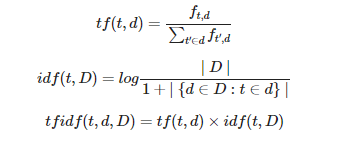

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from pprint import pprint

In [31]:
# Instanciamos el CV
vectorizer = CountVectorizer()

doc1 = 'la matriz de frecuencias por palabras otorga información del contenido de un documento'
doc2 = 'las palabras que aparecen en un documento se relaciona con su tema'
# Definimos una lista con todos los strings
data_corpus = [doc1, doc2]

# Fiteamos el CV y transformamos los datos
X = vectorizer.fit_transform(data_corpus)

# Pasamos de sparse matrix a array usando .toarray()

print(X.toarray())
# Usando el metodo .get_feature_names_out() del CV podemos acceder al indice de palabras
print(vectorizer.get_feature_names_out())

[[0 0 1 2 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1]
 [1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1]]
['aparecen' 'con' 'contenido' 'de' 'del' 'documento' 'en' 'frecuencias'
 'información' 'la' 'las' 'matriz' 'otorga' 'palabras' 'por' 'que'
 'relaciona' 'se' 'su' 'tema' 'un']


A traves de la libreria NLKT y haciendo uso de su apartado STOPWORDS puedo eliminar las palabras que se repiten mucho en los documentos y que no suman mucha importancia

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = list(stopwords.words('spanish'))
# eliminamos las "stop words", palabras comunes no informativas
tf = TfidfVectorizer(stop_words=stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


A traves de la funcion FIT se analiza el texto en el dataframe para aprender el vocabulario de este y las frecuencias de las palabras y con la funcion TRANSFORM lo que se realiza es transformar el conjunto de documentos o en este caso palabras en matrices TF-IDF´s

In [33]:
# calculamos los features para cada ítem (texto)
tfidf_matrix = tf.fit_transform(df['text'])

Calculamos las similitudes coseno entre los diferentes documentos y las almaceno en un diccionario creado antes del for el cual se llama results

In [34]:
# calculamos las similitudes entre todos los documentos
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
n = 6


# diccionario creado para guardar el resultado en un formato (autor - titulo : puntaje, titulo, autor)
results = {}
for idx, row in df.iterrows():
    # guardamos los indices similares basados en la similitud coseno. Los ordenamos en modo ascendente, siendo 0 nada de similitud y 1 total
    similar_indices = cosine_similarities[idx].argsort()[:-n-2:-1]
    # guardamos los N más cercanos
    similar_items = [(f"{df['author'][i]} - {df['title'][i]}", round(cosine_similarities[idx][i], 3)) for i in similar_indices]
    results[f"{row['author']} - {row['title']}"] = similar_items[1:]

Printeo el resultado

In [35]:
pprint(results['Manuel A. Alonso - El jíbaro en la capital'])

[('Manuel A. Alonso - 1833-1883', 0.183),
 ('Baldomero Lillo - El perfil', 0.173),
 ('Manuel A. Alonso - La negrita y la vaquita', 0.167),
 ('Felisberto Hernández - Menos Julia', 0.161),
 ('Manuel A. Alonso - El sueño de mi compadre', 0.155),
 ('Felisberto Hernández - El cocodrilo', 0.135)]


Creo una funcion llamada recomendar la cual toma como parametros, un auto y un titulo del mismo y te devuelve una lista con los libros que mas se parecen a este utilizando las funciones anteriormente aplicadas

In [36]:
def recomendar(autor, titulo):
    pprint(results[f"{autor} - {titulo}"])

Finalmente, lo ponemos a prueba a traves de este codigo, haciendo que me recomiende en base a AXOLOTL de Julio Cortazar

In [37]:
recomendar('Rodolfo Walsh', 'Ese hombre')

[('Rodolfo Walsh - Esa mujer', 0.165),
 ('Mario Benedetti - Réquiem con tostadas', 0.137),
 ('Mario Benedetti - Pacto de sangre', 0.13),
 ('Sergio Pitol - Ícaro', 0.114),
 ('Felisberto Hernández - El cocodrilo', 0.112),
 ('Amparo Dávila - Árboles petrificados', 0.111)]


Ahora tenemos que hacer una funcion para hacer una recomendacion dependiendo de los gustos de un usuario. Para esto, utilizo la misma tecnica que antes, el TF-IDF pero incluyendo valores claves o palabras claves al final del texto. Esta palabra clave va a variar dependiendo de los gustos elegidos por el usuario al momento de iniciar sesion anteriormente

Eliminando las palabras que no sirven de los textos

In [38]:
useful = list(stopwords.words('spanish'))
tfwu= TfidfVectorizer(stop_words=stop)

Agregamos al texto a analizar las palabras claves

CAMBIAR ESTO, FALTA PRIMERO CONVERTIR TODO EL ARRAY EN UN STRING Y CONCATENAR TODAS LAS PALABRAS. DESPUES, EN VEZ DE INGRESARLOS EN EL MISMO TEXTO, CREAR OTRA COLUMNA O AVERIGUAR COMO HACER ESO

Lo agrego a la df

Una vez que tenemos los gustos del usuario incluidos en nuestra DataBase, pasamos a calcular sus features

Pasamos a calcular la similitud de cosenos entre el texto y los gustos del usuario